## TVB-Framework command initialisation

In [1]:
import os
from collections import OrderedDict
import time
import numpy as np

from tvb.basic.profile import TvbProfile
TvbProfile.set_profile(TvbProfile.LIBRARY_PROFILE)

from tvb_multiscale.tvb_nest.config import *

work_path = os.getcwd()
data_path = work_path
tvb_conn_filepath = os.path.join(data_path, "Connectivity_res100_596_regions.h5")
outputs_path = os.path.join(work_path, "outputs/cereb")
config = Config(output_base=outputs_path)

config.figures.SHOW_FLAG = True 
config.figures.SAVE_FLAG = True
config.figures.FIG_FORMAT = 'png'
config.figures.DEFAULT_SIZE= config.figures.NOTEBOOK_SIZE
FIGSIZE = config.figures.DEFAULT_SIZE

from tvb_multiscale.core.plot.plotter import Plotter
plotter = Plotter(config.figures)

# For interactive plotting:
# %matplotlib notebook  

# Otherwise:
%matplotlib inline 

2021-05-18 12:29:39,632 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2021-05-18 12:29:39,632 - INFO - tvb_multiscale.tvb_nest.config - Loading a NEST instance...
2021-05-18 12:29:39,642 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2021-05-18 12:29:39,642 - INFO - tvb_multiscale.tvb_nest.config - NEST_INSTALL_DIR: /home/docker/env/neurosci/nest_build
2021-05-18 12:29:39,646 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2021-05-18 12:29:39,646 - INFO - tvb_multiscale.tvb_nest.config - NEST_DATA_DIR: /home/docker/env/neurosci/nest_build/share/nest
2021-05-18 12:29:39,649 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2021-05-18 12:29:39,649 - INFO - tvb_multiscale.tvb_nest.config - NEST_DOC_DIR: /home/docker/env/neurosci/nest_build/share/doc/nest
2021-05-18 12:29:39,653 - INFO - tvb_multiscale.tv

# This loads the just-prepared data:

In [2]:
import h5py
from tvb.datatypes.connectivity import Connectivity

f = h5py.File(tvb_conn_filepath)
result_connectivity = Connectivity(weights=np.array(f["weights"][()]), tract_lengths=np.array(f["tract_lengths"][()]), 
                               centres=np.array(f["centres"][()]), # hemispheres=np.array(f["hemispheres"][()]), 
                               region_labels=np.array(f["region_labels"][()]).astype("<U128"))
f.close()
result_connectivity.configure()
print(result_connectivity.weights)
print(result_connectivity.region_labels)
print(result_connectivity.number_of_regions)
print(result_connectivity.weights.shape)
print(result_connectivity.tract_lengths.shape)


[[3.02775796e-01 3.32728901e-02 9.89313689e-02 ... 1.36803986e-06
  1.95515882e-07 2.71852623e-05]
 [3.63441680e-02 9.30192841e-02 6.43270451e-02 ... 6.32084139e-05
  5.04100941e-05 4.45484959e-04]
 [8.47970561e-02 5.49682272e-02 7.45274259e-02 ... 2.99611362e-05
  4.17897432e-05 2.03744779e-04]
 ...
 [8.07329172e-07 2.73112949e-05 3.36029153e-05 ... 1.21380092e-01
  5.17439950e-02 3.86534058e-02]
 [8.07329172e-07 2.85348052e-05 3.54584335e-05 ... 1.00408312e-01
  7.84903743e-02 3.67525396e-02]
 [1.02162597e-04 2.77993498e-05 9.15227954e-06 ... 1.37087573e-02
  2.65998675e-03 2.71759043e-01]]
['Right Frontal pole, cerebral cortex' 'Right Primary motor area'
 'Right Secondary motor area' 'Right Primary somatosensory area, nose'
 'Right Primary somatosensory area, barrel field'
 'Right Primary somatosensory area, lower limb'
 'Right Primary somatosensory area, mouth'
 'Right Primary somatosensory area, upper limb'
 'Right Primary somatosensory area, trunk'
 'Right Primary somatosensory a

## Summarize the major structures, except for the cerebellum

In [3]:
#pip install xlrd
import sys
!{sys.executable} -m pip install xlrd

     |████████████████████████████████| 96 kB 642 kB/s eta 0:00:01
You should consider upgrading via the '/home/docker/env/neurosci/bin/python3 -m pip install --upgrade pip' command.


In [4]:
import xlrd
sheet_data = []   
wb = xlrd.open_workbook(os.path.join(data_path, 'oh_table1.xls'))
p = wb.sheet_names()
#p[1]
#for y in p:
sh = wb.sheet_by_name(p[1])
sh
for rownum in range(sh.nrows):
    sheet_data.append((sh.row_values(rownum)))

found_list = []
rows_to_be_saved = []
regions_missing = []
cc=0

for j in result_connectivity.region_labels: #go over the region labels
    j=j.split(" ",1)[1]
    #let us get rid of the left or right
    a=len(found_list)
    for i in sheet_data:
        if i[3] == j: #or i[2] == "string2" or i[2] == "string3" or i[2] == "string4" or i[2] == "string5":
            found_list.append(i[4])
        else:
            rows_to_be_saved.append(i)
    
    b=len(found_list)
    if a == b:
        regions_missing.append(j)
        found_list.append('X')
        print(a,b)
    
    b=len(found_list)
    cc+=1
    if b != cc:
        print(b,cc)
regions_missing
print(len(found_list))
print(np.unique(found_list))

596
['Cerebellar Cortex' 'Cerebellar Nuclei' 'Cortical Subplate'
 'Hippocampal Formation' 'Hypothalamus' 'Isocortex' 'Medulla' 'Midbrain'
 'Olfactory Areas' 'Pallidum' 'Pons' 'Striatum' 'Thalamus']


Let us summarize all the other regions where we already know their major structure

In [5]:
sum_conn=result_connectivity.weights
q=0
sum_conn_new= np.zeros((47,47)) #one more cerebellar nuclei region --> 36 regions cerebellum (right and left) + 11 major structures
which_major=np.zeros(596)
for i in np.unique(found_list):
    #print(i)
    for j in range(len(found_list)): #over all regions
        if i == found_list[j]: #then this region belongs to this major structure
            #print(i,found_list[j])
            which_major[j]=q #.append(q) #a list giving every region its number belonging to the major structure
            #print(which_major)
    q+=1
    
unique, counts = np.unique(which_major, return_counts=True)
sum_conn_new[0:sum(counts[0:2])][:,0:sum(counts[0:2])]=sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]
for k in range(0,(len(unique)-2)): #11 major other structures are out there , change this to include the X's
    for reg in range(sum(counts[0:2])):
        sum_conn_new[sum(counts[0:2])+k,reg]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)],reg])
        sum_conn_new[reg,sum(counts[0:2])+k]=np.sum(sum_conn[reg,[i for i,x in enumerate(which_major) if x==(k+2)]])
    for l in range(k+1,(len(unique)-2)): #with all other major structure
        sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
        sum_conn_new[sum(counts[0:2])+l,sum(counts[0:2])+k]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(l+2)]][:,[i for i,x in enumerate(which_major) if x==(k+2)]])
#now still to fill major structures among each other #11x11 matrix
#put diagonal to zero
for jj in range(47):
    sum_conn_new[jj,jj]=0


/home/docker/env/neurosci/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


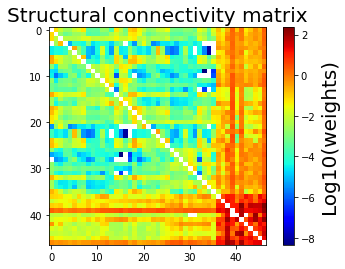

In [6]:
import matplotlib.pyplot as plt

plt.subplots()
cs=plt.imshow(np.log10(sum_conn_new), cmap='jet', aspect='equal', interpolation='none')

plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)


In [7]:
import h5py

# the method returns the tract lengths between the brain areas in the selected parcellation
def construct_tract_lengths(centres):
    n_regions = len(centres)
    tracts = np.zeros((n_regions, n_regions), dtype=float)
    for i_ind, inj in enumerate(centres):
        for i_targ, targ in enumerate(centres):
            tracts[i_ind, i_targ] = np.sqrt(
                (inj[0] - targ[0]) ** 2 + (inj[1] - targ[1]) ** 2 + (inj[2] - targ[2]) ** 2)
    return tracts

def write_connectivity_to_h5_file(connectivity, filename):
    #save the structural conn matrix
    f = h5py.File(os.path.join(data_path, filename), "w")
    for attr in ["weights", "tract_lengths", "centres", "region_labels"]:
        if attr == "region_labels":
            f.create_dataset(attr, data=getattr(connectivity, attr).astype(h5py.string_dtype(encoding='utf-8')))

        else:
            f.create_dataset(attr, data=getattr(connectivity, attr))
    f.close()  
    

In [8]:

#save this matrix
# results: Connectivity, Volume & RegionVolumeMapping
        # Connectivity
result_connectivity_sum = Connectivity()
#average over all centres in this major region
centres = result_connectivity.centres
centres_sum= np.zeros((47,3))
centres_sum[0:sum(counts[0:2])]=centres[[i for i,x in enumerate(which_major) if x < 2]]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    centres_sum[sum(counts[0:2])+k]= np.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
result_connectivity_sum.centres = centres_sum

names_sum=[]# np.zeros((45))
indices=[i for i,x in enumerate(which_major) if x < 2]
new= np.array(result_connectivity.region_labels)

names_sum[0:sum(counts[0:2])]=new[indices]
nn= np.unique(found_list)
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    names_sum.append(nn[k+2])
    
# #put in names of major structures
result_connectivity_sum.region_labels =  np.array(names_sum)
result_connectivity_sum.weights = sum_conn_new
#calculate new tract lengths based on new centres
tract_lengths_sum = construct_tract_lengths(centres_sum)
result_connectivity_sum.tract_lengths = tract_lengths_sum
result_connectivity_sum.configure()

write_connectivity_to_h5_file(result_connectivity_sum, "Connectivity_res100_summ47regions.h5")
              
print(result_connectivity_sum.weights)
print(result_connectivity_sum.region_labels)
print(result_connectivity_sum.number_of_regions)
print(len(result_connectivity_sum.region_labels))
print(result_connectivity_sum.weights.shape)
print(result_connectivity_sum.tract_lengths.shape)


[[0.00000000e+00 6.37201225e-02 9.87690782e-03 ... 5.74400512e-01
  2.18272204e-01 2.15602016e+00]
 [7.67431520e-02 0.00000000e+00 2.17168609e-03 ... 4.75801969e-01
  2.95706669e-01 1.70049895e+00]
 [7.53363242e-02 7.68371793e-03 0.00000000e+00 ... 5.37458870e-01
  2.81266215e-01 1.85413766e+00]
 ...
 [8.13162042e-03 8.85495862e-03 1.02934538e-02 ... 0.00000000e+00
  3.05718881e+00 4.66118053e+01]
 [7.09475893e-02 2.81523081e-02 3.29953885e-02 ... 4.59478054e+00
  0.00000000e+00 2.15520827e+01]
 [6.95933979e-01 4.49201089e-01 5.68379475e-01 ... 2.27380013e+01
  2.62547602e+01 0.00000000e+00]]
['Right Lingula (I)' 'Right Central lobule' 'Right Culmen'
 'Right Declive (VI)' 'Right Folium-tuber vermis (VII)'
 'Right Pyramus (VIII)' 'Right Uvula (IX)' 'Right Nodulus (X)'
 'Right Simple lobule' 'Right Ansiform lobule' 'Right Paramedian lobule'
 'Right Copula pyramidis' 'Right Paraflocculus' 'Right Flocculus'
 'Right Fastigial nucleus' 'Right Interposed nucleus'
 'Right Dentate nucleus' 'Rig

In [9]:
f.close()

Now let us take out the Inferior olivary complex from the medulla in order to have it also as a spiking region:

In [10]:
np.unique(found_list)

array(['Cerebellar Cortex', 'Cerebellar Nuclei', 'Cortical Subplate',
       'Hippocampal Formation', 'Hypothalamus', 'Isocortex', 'Medulla',
       'Midbrain', 'Olfactory Areas', 'Pallidum', 'Pons', 'Striatum',
       'Thalamus'], dtype='<U21')

In [11]:
which_major #medulla is 6

counts #78 regions in medulla
#if 'inferior_olivary_complex' in result_connectivity.region_labels
matching = [s for s in result_connectivity.region_labels if "Inferior olivary complex" in s]
matching
#result_connectivity.region_labels.index("Inferior olivary complex")
indiol=np.where(result_connectivity.region_labels == "Right Inferior olivary complex")
indior= np.where(result_connectivity.region_labels == "Left Inferior olivary complex")
which_major[indiol]

array([6.])

In [12]:
sum_conn=result_connectivity.weights
q=0
sum_conn_new= np.zeros((49,49)) #one more cerebellar nuclei region --> 36 regions cerebellum (right and left) + 11 major structures
which_major=np.zeros(596)
for i in np.unique(found_list):
    #print(i)
    for j in range(len(found_list)): #over all regions
        if i == found_list[j]: #then this region belongs to this major structure
            #print(i,found_list[j])
            which_major[j]=q #.append(q) #a list giving every region its number belonging to the major structure
            #print(which_major)
    q+=1

# let us treat inferior olive as one of the cerebellar regions, therefore we will now manipulate the major region to cerebellum
which_major[indiol]=0
which_major[indior]=0


unique, counts = np.unique(which_major, return_counts=True)
sum_conn_new[0:sum(counts[0:2])][:,0:sum(counts[0:2])]=sum_conn[[i for i,x in enumerate(which_major) if x < 2]][:,[i for i,x in enumerate(which_major) if x < 2]]
#alright the above line puts the inside-cerebellar connections in the new connectome
#sum_conn[0:sum(counts[0:2])][:,0:sum(counts[0:2])]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there , change this to include the X's
    for reg in range(sum(counts[0:2])):
        sum_conn_new[sum(counts[0:2])+k,reg]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)],reg])
        sum_conn_new[reg,sum(counts[0:2])+k]=np.sum(sum_conn[reg,[i for i,x in enumerate(which_major) if x==(k+2)]])
    for l in range(k+1,(len(unique)-2)): #with all other major structure
        sum_conn_new[sum(counts[0:2])+k,sum(counts[0:2])+l]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(k+2)]][:,[i for i,x in enumerate(which_major) if x==(l+2)]])
        sum_conn_new[sum(counts[0:2])+l,sum(counts[0:2])+k]=np.sum(sum_conn[[i for i,x in enumerate(which_major) if x==(l+2)]][:,[i for i,x in enumerate(which_major) if x==(k+2)]])
#now still to fill major structures among each other #11x11 matrix
#put diagonal to zero
for jj in range(49):
    sum_conn_new[jj,jj]=0


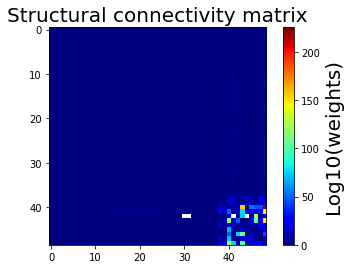

In [26]:
plt.subplots()
#cs=plt.imshow(np.log10(conn.weights), cmap='jet', aspect='equal', interpolation='none')
cs=plt.imshow(sum_conn_new, cmap='jet', aspect='equal', interpolation='none')
# cs=plt.imshow(np.log10(sum_conn_new), cmap='jet', aspect='equal', interpolation='none')

plt.title('Structural connectivity matrix', fontsize=20)
axcb=plt.colorbar(cs)
axcb.set_label('Log10(weights)', fontsize=20)

In [14]:

result_connectivity_sum = Connectivity()
#average over all centres in this major region
centres_sum= np.zeros((49,3))
centres_sum[0:sum(counts[0:2])]=centres[[i for i,x in enumerate(which_major) if x < 2]]  
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    centres_sum[sum(counts[0:2])+k]= np.mean(centres[[i for i,x in enumerate(which_major) if x==(k+2)]], axis=0)
    
result_connectivity_sum.centres = centres_sum

names_sum=[]# np.zeros((45))
indices=[i for i,x in enumerate(which_major) if x < 2]
new= np.array(result_connectivity.region_labels)

names_sum[0:sum(counts[0:2])]=new[indices]
nn= np.unique(found_list)
for k in range(0,(len(unique)-2)): #11 major other structures are out there  
    names_sum.append(nn[k+2])
    
# #put in names of major structures
result_connectivity_sum.region_labels =  np.array(np.array(names_sum))
result_connectivity_sum.weights = sum_conn_new
#calculate new tract lengths based on new centres
tract_lengths_sum = construct_tract_lengths(centres_sum)
result_connectivity_sum.tract_lengths = tract_lengths_sum
result_connectivity_sum.configure()

#save the structural conn matrix
write_connectivity_to_h5_file(result_connectivity_sum, "Connectivity_res100_summ49regions_IOsplit.h5")

print(result_connectivity_sum.weights)
print(result_connectivity_sum.region_labels)
print(result_connectivity_sum.number_of_regions)
print(len(result_connectivity_sum.region_labels))
print(result_connectivity_sum.weights.shape)
print(result_connectivity_sum.tract_lengths.shape)

[[0.00000000e+00 7.81681832e-03 1.20612596e-02 ... 5.74400512e-01
  2.18272204e-01 2.15602016e+00]
 [1.34234430e-04 0.00000000e+00 6.37201225e-02 ... 4.75801969e-01
  2.95706669e-01 1.70049895e+00]
 [1.23547051e-03 7.67431520e-02 0.00000000e+00 ... 5.37458870e-01
  2.81266215e-01 1.85413766e+00]
 ...
 [8.13162042e-03 8.85495862e-03 1.02934538e-02 ... 0.00000000e+00
  3.05718881e+00 4.66118053e+01]
 [7.09475893e-02 2.81523081e-02 3.29953885e-02 ... 4.59478054e+00
  0.00000000e+00 2.15520827e+01]
 [6.95933979e-01 4.49201089e-01 5.68379475e-01 ... 2.27380013e+01
  2.62547602e+01 0.00000000e+00]]
['Right Inferior olivary complex' 'Right Lingula (I)'
 'Right Central lobule' 'Right Culmen' 'Right Declive (VI)'
 'Right Folium-tuber vermis (VII)' 'Right Pyramus (VIII)'
 'Right Uvula (IX)' 'Right Nodulus (X)' 'Right Simple lobule'
 'Right Ansiform lobule' 'Right Paramedian lobule'
 'Right Copula pyramidis' 'Right Paraflocculus' 'Right Flocculus'
 'Right Fastigial nucleus' 'Right Interposed nucl